In [1]:
# -*- encoding:urf-8 -*-
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table like and matrices
import pandas as pd
import numpy as np

# Modeling Helper
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

# Configure visualization
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

train_path = 'train.csv'
test_path = 'test.csv'
train = pd.read_csv(train_path,encoding='gbk',engine='python')
test = pd.read_csv(test_path)

In [2]:
train

,custid,BigCode,BigName,MidCode,MidName,SmallCode,SmallName,SaleDate,SaleMonth,Code,Standard,CumType,Unit,SaleNum,SalePrice,UnitPrice,Coupon
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,20150101,201501,DW-1201090311,,生鲜,个,8.000,4.00,2.00,0.0
1,1,20,粮油,2014,酱菜类,201401,榨菜,20150101,201501,DW-2014010019,60g,一般商品,袋,6.000,3.00,0.50,0.0
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020011,150g,一般商品,袋,1.000,2.40,2.40,0.0
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,20150101,201501,DW-1503050035,500g,一般商品,袋,1.000,6.50,8.30,0.0
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020020,100g*8,一般商品,袋,1.000,11.90,11.90,0.0
5,5,30,洗化,3018,卫生巾,301802,夜用卫生巾,20150101,201501,DW-3018020109,10片,一般商品,包,1.000,8.90,8.90,0.0
6,6,12,蔬果,1201,蔬菜,120104,花果,20150101,201501,DW-1201040022,散称,生鲜,千克,0.964,8.07,5.60,0.0
7,7,20,粮油,2001,袋装速食面,200101,牛肉口味,20150101,201501,DW-2001010062,120g,一般商品,袋,1.000,2.50,3.00,0.0
8,8,13,熟食,1308,现制中式面点,130803,现制烙类,20150101,201501,DW-1308030035,个,生鲜,个,2.000,2.00,1.00,0.0
9,9,22,休闲,2203,膨化点心,220302,袋装薯片,20150101,201501,DW-2203020029,45g,一般商品,袋,1.000,4.00,4.00,0.0


### Time Handling

In [3]:
def timeHandle(s):
    s = str(s)
    s = [s[:4],s[4:6],s[6:]]
    return '-'.join(s)

In [4]:
l_trainHoliday = [20150101,20150102,20150103,20150218,20150219,20150220,20150221,20150222,20150223,20150224,20150404,20150405,20150406]
l_trainLeave = [20150101,20150102,20150103,20150218,20150219,20150220,20150221,20150222,20150223,20150224,20150404,20150405,20150406,
           20150110,20150111,20150117,20150118,20150124,20150125,20150131,
           20150201,20150207,20150208,20150214,20150215,
           20150301,20150307,20150308,20150314,20150315,20150321,20150322,20150328,20150329,
           20150411,20150412,20150418,20150419,20150425,20150426]
l_testHoliday = [20150501,20150502,20150503]
l_tesLeave = [20150501,20150502,20150503,20150509,20150510,20150516,20150517,20150523,20150524,20150530,20150531]

train.loc[:,'isHoliday'] = train.SaleDate.isin(l_trainHoliday)
train.loc[:,'isLeave'] = train.SaleDate.isin(l_trainLeave)
train.loc[:,'DayofMonth'] = train.SaleDate.map(lambda x: str(x)[6:]).astype('int')
train.isHoliday = train.isHoliday.astype('int')
train.isLeave = train.isLeave.astype('int')
train.SaleDate = train.SaleDate.map(lambda x: timeHandle(x))
train.SaleDate = pd.to_datetime(train.SaleDate)
train.loc[:,'Month'] = train.SaleDate.dt.month
train.loc[:,'Weekday'] = train.SaleDate.dt.dayofweek
train

,custid,BigCode,BigName,MidCode,MidName,SmallCode,SmallName,SaleDate,SaleMonth,Code,...,Unit,SaleNum,SalePrice,UnitPrice,Coupon,isHoliday,isLeave,DayofMonth,Month,Weekday
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2015-01-01,201501,DW-1201090311,...,个,8.000,4.00,2.00,0.0,1,1,1,1,3
1,1,20,粮油,2014,酱菜类,201401,榨菜,2015-01-01,201501,DW-2014010019,...,袋,6.000,3.00,0.50,0.0,1,1,1,1,3
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020011,...,袋,1.000,2.40,2.40,0.0,1,1,1,1,3
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2015-01-01,201501,DW-1503050035,...,袋,1.000,6.50,8.30,0.0,1,1,1,1,3
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020020,...,袋,1.000,11.90,11.90,0.0,1,1,1,1,3
5,5,30,洗化,3018,卫生巾,301802,夜用卫生巾,2015-01-01,201501,DW-3018020109,...,包,1.000,8.90,8.90,0.0,1,1,1,1,3
6,6,12,蔬果,1201,蔬菜,120104,花果,2015-01-01,201501,DW-1201040022,...,千克,0.964,8.07,5.60,0.0,1,1,1,1,3
7,7,20,粮油,2001,袋装速食面,200101,牛肉口味,2015-01-01,201501,DW-2001010062,...,袋,1.000,2.50,3.00,0.0,1,1,1,1,3
8,8,13,熟食,1308,现制中式面点,130803,现制烙类,2015-01-01,201501,DW-1308030035,...,个,2.000,2.00,1.00,0.0,1,1,1,1,3
9,9,22,休闲,2203,膨化点心,220302,袋装薯片,2015-01-01,201501,DW-2203020029,...,袋,1.000,4.00,4.00,0.0,1,1,1,1,3


In [5]:
train.Coupon = train.Coupon.astype('int')
train.CumType.value_counts()

一般商品     26070
生鲜       16195
联营商品       549
12g*8        2
Name: CumType, dtype: int64

MidCode
1201    9893
1203    3235
2202    1615
2201    1609
2203    1460
1505    1181
2205    1085
1518    1051
1521    1030
2011    1026
3016     957
1001     930
1202     905
2206     771
2014     737
2207     637
2006     625
3018     619
2204     614
2008     551
2013     474
2009     472
1308     446
3013     431
2005     413
2007     382
1517     363
1501     335
2303     329
3006     323
        ... 
2308       4
3102       4
3113       4
3406       4
1007       4
2004       3
3108       3
3326       3
3401       3
3432       3
3213       3
3216       2
1514       2
1402       2
3313       2
3104       2
3314       2
2108       2
3428       2
3429       2
3436       1
3101       1
3128       1
3212       1
3215       1
3303       1
3404       1
3416       1
3419       1
2315       1
Name: SaleNum, Length: 178, dtype: int64

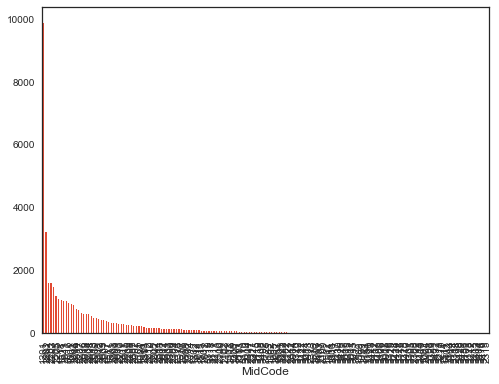

In [39]:
t = train.groupby('MidCode')['SaleNum'].count().sort_values(ascending=False)
t.plot(kind='bar')
t

### 候选特征：商品周转指数（寿命）

In [68]:
train.columns

### 候选特征: 商品规格指数

In [75]:
coord = train.groupby('Standard',as_index=False)['SaleNum'].agg({'StandardIndex':'count'})
train = pd.merge(train, coord, on='Standard', how='left')
train.StandardIndex = train.StandardIndex / (1.0 * train.shape[0])
train

,custid,BigCode,BigName,MidCode,MidName,SmallCode,SmallName,SaleDate,SaleMonth,Code,...,SaleNum,SalePrice,UnitPrice,Coupon,isHoliday,isLeave,DayofMonth,Month,Weekday,StandardIndex
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2015-01-01,201501,DW-1201090311,...,8.000,4.00,2.00,0,1,1,1,1,3,0.008875
1,1,20,粮油,2014,酱菜类,201401,榨菜,2015-01-01,201501,DW-2014010019,...,6.000,3.00,0.50,0,1,1,1,1,3,0.010113
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020011,...,1.000,2.40,2.40,0,1,1,1,1,3,0.009482
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2015-01-01,201501,DW-1503050035,...,1.000,6.50,8.30,0,1,1,1,1,3,0.010020
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020020,...,1.000,11.90,11.90,0,1,1,1,1,3,0.006890
5,5,30,洗化,3018,卫生巾,301802,夜用卫生巾,2015-01-01,201501,DW-3018020109,...,1.000,8.90,8.90,0,1,1,1,1,3,0.005839
6,6,12,蔬果,1201,蔬菜,120104,花果,2015-01-01,201501,DW-1201040022,...,0.964,8.07,5.60,0,1,1,1,1,3,0.453966
7,7,20,粮油,2001,袋装速食面,200101,牛肉口味,2015-01-01,201501,DW-2001010062,...,1.000,2.50,3.00,0,1,1,1,1,3,0.007450
8,8,13,熟食,1308,现制中式面点,130803,现制烙类,2015-01-01,201501,DW-1308030035,...,2.000,2.00,1.00,0,1,1,1,1,3,0.004811
9,9,22,休闲,2203,膨化点心,220302,袋装薯片,2015-01-01,201501,DW-2203020029,...,1.000,4.00,4.00,0,1,1,1,1,3,0.006913


In [44]:
train[train.CumType == u'生鲜'].BigName.value_counts()

蔬果    14192
肉禽     1234
熟食      510
水产      195
日配       46
烘焙       18
Name: BigName, dtype: int64

In [45]:
train[train.CumType == u'一般商品'].BigName.value_counts()

休闲    8742
粮油    5874
日配    4734
洗化    3067
酒饮    1868
家居     591
冲调     565
针织     304
文体     267
家电      50
肉禽       8
Name: BigName, dtype: int64

In [46]:
train[train.CumType == u'联营商品'].BigName.value_counts()

熟食    379
休闲    107
酒饮     35
冲调     26
针织      1
洗化      1
Name: BigName, dtype: int64

### 候选特征：大类商品热门指数

In [89]:
coord = train.groupby('BigName',as_index=False)['SaleNum'].agg({'BigIndex':'count'})
train = pd.merge(train,coord,on='BigName',how='left')
train['BigIndex'] = train['BigIndex'] / (1.0 * train.shape[0])
train

,custid,BigCode,BigName,MidCode,MidName,SmallCode,SmallName,SaleDate,SaleMonth,Code,...,SalePrice,UnitPrice,Coupon,isHoliday,isLeave,DayofMonth,Month,Weekday,StandardIndex,BigIndex
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2015-01-01,201501,DW-1201090311,...,4.00,2.00,0,1,1,1,1,3,0.008875,0.331465
1,1,20,粮油,2014,酱菜类,201401,榨菜,2015-01-01,201501,DW-2014010019,...,3.00,0.50,0,1,1,1,1,3,0.010113,0.137192
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020011,...,2.40,2.40,0,1,1,1,1,3,0.009482,0.111641
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2015-01-01,201501,DW-1503050035,...,6.50,8.30,0,1,1,1,1,3,0.010020,0.111641
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020020,...,11.90,11.90,0,1,1,1,1,3,0.006890,0.111641
5,5,30,洗化,3018,卫生巾,301802,夜用卫生巾,2015-01-01,201501,DW-3018020109,...,8.90,8.90,0,1,1,1,1,3,0.005839,0.071655
6,6,12,蔬果,1201,蔬菜,120104,花果,2015-01-01,201501,DW-1201040022,...,8.07,5.60,0,1,1,1,1,3,0.453966,0.331465
7,7,20,粮油,2001,袋装速食面,200101,牛肉口味,2015-01-01,201501,DW-2001010062,...,2.50,3.00,0,1,1,1,1,3,0.007450,0.137192
8,8,13,熟食,1308,现制中式面点,130803,现制烙类,2015-01-01,201501,DW-1308030035,...,2.00,1.00,0,1,1,1,1,3,0.004811,0.020763
9,9,22,休闲,2203,膨化点心,220302,袋装薯片,2015-01-01,201501,DW-2203020029,...,4.00,4.00,0,1,1,1,1,3,0.006913,0.206675


### 候选特征：中类商品热门指数

In [90]:
coord = train.groupby('MidName',as_index=False)['SaleNum'].agg({'MidIndex':'count'})
train = pd.merge(train,coord,on='MidName',how='left')
train['MidIndex'] = train['MidIndex'] / (1.0 * train.shape[0])
train

,custid,BigCode,BigName,MidCode,MidName,SmallCode,SmallName,SaleDate,SaleMonth,Code,...,UnitPrice,Coupon,isHoliday,isLeave,DayofMonth,Month,Weekday,StandardIndex,BigIndex,MidIndex
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2015-01-01,201501,DW-1201090311,...,2.00,0,1,1,1,1,3,0.008875,0.331465,0.231058
1,1,20,粮油,2014,酱菜类,201401,榨菜,2015-01-01,201501,DW-2014010019,...,0.50,0,1,1,1,1,3,0.010113,0.137192,0.017213
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020011,...,2.40,0,1,1,1,1,3,0.009482,0.111641,0.027583
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2015-01-01,201501,DW-1503050035,...,8.30,0,1,1,1,1,3,0.010020,0.111641,0.001448
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020020,...,11.90,0,1,1,1,1,3,0.006890,0.111641,0.027583
5,5,30,洗化,3018,卫生巾,301802,夜用卫生巾,2015-01-01,201501,DW-3018020109,...,8.90,0,1,1,1,1,3,0.005839,0.071655,0.014457
6,6,12,蔬果,1201,蔬菜,120104,花果,2015-01-01,201501,DW-1201040022,...,5.60,0,1,1,1,1,3,0.453966,0.331465,0.231058
7,7,20,粮油,2001,袋装速食面,200101,牛肉口味,2015-01-01,201501,DW-2001010062,...,3.00,0,1,1,1,1,3,0.007450,0.137192,0.006773
8,8,13,熟食,1308,现制中式面点,130803,现制烙类,2015-01-01,201501,DW-1308030035,...,1.00,0,1,1,1,1,3,0.004811,0.020763,0.010417
9,9,22,休闲,2203,膨化点心,220302,袋装薯片,2015-01-01,201501,DW-2203020029,...,4.00,0,1,1,1,1,3,0.006913,0.206675,0.034099


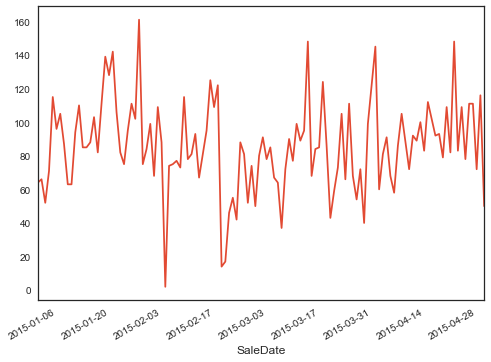

In [116]:
coord = train[train.MidCode == 1201].groupby(['SaleDate'])['SaleNum'].count()
coord.plot()

In [120]:
x = coord.rolling(window=7).std()
x

SaleDate
2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07    23.844736
2015-01-08    22.618997
2015-01-09    23.053767
2015-01-10    20.758246
2015-01-11    19.841035
2015-01-12    18.812357
2015-01-13    18.517688
2015-01-14    16.677615
2015-01-15    16.713268
2015-01-16    15.096515
2015-01-17    10.501701
2015-01-18    12.667920
2015-01-19    20.663978
2015-01-20    22.146697
2015-01-21    23.914530
2015-01-22    21.598060
2015-01-23    24.889279
2015-01-24    26.428700
2015-01-25    27.195938
2015-01-26    24.019833
2015-01-27    21.889332
2015-01-28    28.017002
2015-01-29    30.124345
2015-01-30    29.932464
                ...    
2015-03-29    25.785747
2015-03-30    24.647032
2015-04-01    36.310827
2015-04-02    35.120880
2015-04-03    34.917590
2015-04-04    33.316662
2015-04-05    33.589964
2015-04-06    30.232433
2015-04-07    29.695278
2015-04-08    17.290239
2015-04

In [99]:
moving_avg = pd.rolling_mean(coord,7)
print moving_avg.shape
print coord.shape
# plt.plot(coord)
# plt.plot(moving_avg, color='red')

(116L,)
(116L,)


In [102]:
expwighted_avg = pd.ewma(coord, halflife=7)
print expwighted_avg.shape
type(coord)

(116L,)


pandas.core.series.Series

### 生鲜的销售分布

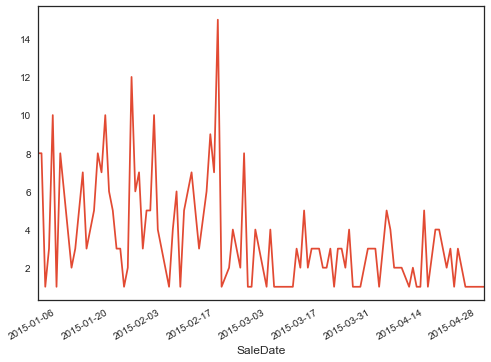

In [171]:
train.loc[:,'WeekOfYear'] = train.SaleDate.dt.weekofyear
vegetable = train[train.MidName == u'南北干货'].groupby(['SaleDate'])['SaleNum'].count()
vegetable = vegetable.fillna(0)
# vegetable = x.rolling(window=12).mean()
vegetable.plot()

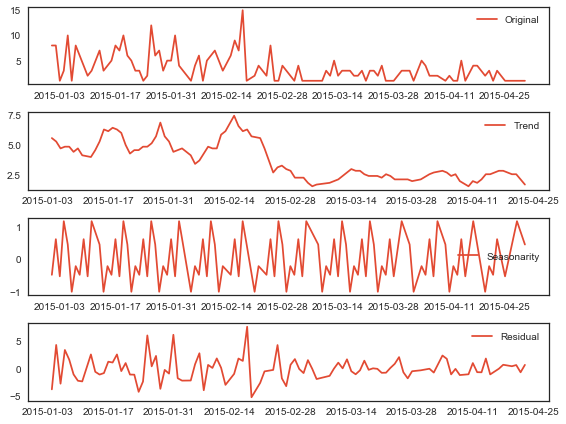

In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose
# vegetable = np.log(vegetable)
decomposition = seasonal_decompose(vegetable,freq=7)
trend = decomposition.trend
seasonal = decomposition.seasonal  # 季节性
residual = decomposition.resid  # 剩余的
seasonal

plt.subplot(411)
plt.plot(vegetable,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonarity')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# vegetable

In [124]:
train

,custid,BigCode,BigName,MidCode,MidName,SmallCode,SmallName,SaleDate,SaleMonth,Code,...,Coupon,isHoliday,isLeave,DayofMonth,Month,Weekday,StandardIndex,BigIndex,MidIndex,WeekOfYear
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2015-01-01,201501,DW-1201090311,...,0,1,1,1,1,3,0.008875,0.331465,0.231058,1
1,1,20,粮油,2014,酱菜类,201401,榨菜,2015-01-01,201501,DW-2014010019,...,0,1,1,1,1,3,0.010113,0.137192,0.017213,1
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020011,...,0,1,1,1,1,3,0.009482,0.111641,0.027583,1
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2015-01-01,201501,DW-1503050035,...,0,1,1,1,1,3,0.010020,0.111641,0.001448,1
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020020,...,0,1,1,1,1,3,0.006890,0.111641,0.027583,1
5,5,30,洗化,3018,卫生巾,301802,夜用卫生巾,2015-01-01,201501,DW-3018020109,...,0,1,1,1,1,3,0.005839,0.071655,0.014457,1
6,6,12,蔬果,1201,蔬菜,120104,花果,2015-01-01,201501,DW-1201040022,...,0,1,1,1,1,3,0.453966,0.331465,0.231058,1
7,7,20,粮油,2001,袋装速食面,200101,牛肉口味,2015-01-01,201501,DW-2001010062,...,0,1,1,1,1,3,0.007450,0.137192,0.006773,1
8,8,13,熟食,1308,现制中式面点,130803,现制烙类,2015-01-01,201501,DW-1308030035,...,0,1,1,1,1,3,0.004811,0.020763,0.010417,1
9,9,22,休闲,2203,膨化点心,220302,袋装薯片,2015-01-01,201501,DW-2203020029,...,0,1,1,1,1,3,0.006913,0.206675,0.034099,1


## 候选特征：单品热门指数，单品销量增长率，单品复合销量增长率，单品同比增长率, 商品寿命, 中类商品的周期性

In [11]:
var = train.groupby(['SaleDate','BigCode'])['SaleNum'].count()
var = var.unstack()
var

BigCode,10,11,12,13,14,15,20,21,22,23,30,31,32,33,34
SaleDate,,,,,,,,,,,,,,,
2015-01-01,4.0,2.0,103.0,10.0,1.0,30.0,49.0,9.0,44.0,11.0,39.0,4.0,2.0,3.0,2.0
2015-01-02,9.0,1.0,99.0,6.0,1.0,33.0,59.0,8.0,72.0,16.0,28.0,2.0,NaN,3.0,1.0
2015-01-03,10.0,NaN,80.0,8.0,NaN,28.0,42.0,3.0,76.0,9.0,22.0,2.0,1.0,2.0,NaN
2015-01-04,7.0,NaN,107.0,4.0,NaN,24.0,58.0,8.0,90.0,18.0,20.0,1.0,NaN,5.0,1.0
2015-01-05,13.0,NaN,161.0,8.0,NaN,33.0,62.0,7.0,41.0,5.0,40.0,7.0,1.0,1.0,2.0
2015-01-06,7.0,1.0,146.0,5.0,NaN,36.0,62.0,8.0,75.0,7.0,41.0,9.0,1.0,5.0,5.0
2015-01-07,39.0,3.0,144.0,13.0,NaN,66.0,82.0,NaN,88.0,11.0,45.0,7.0,1.0,4.0,3.0
2015-01-08,9.0,1.0,129.0,7.0,1.0,43.0,55.0,3.0,65.0,10.0,19.0,5.0,NaN,1.0,NaN
2015-01-09,5.0,1.0,104.0,6.0,2.0,33.0,53.0,6.0,91.0,26.0,15.0,7.0,NaN,2.0,NaN


In [7]:
test.Code.unique()

array([1001, 1002, 1004, 1005, 1099, 1101, 1102, 1103, 1201, 1202, 1203,
       1205, 1301, 1302, 1306, 1308, 1501, 1502, 1503, 1504, 1505, 1507,
       1508, 1510, 1511, 1512, 1513, 1515, 1516, 1517, 1518, 1519, 1521,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2101, 2102, 2103, 2104, 2105, 2106, 2107,
       2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211,
       2212, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2309, 2310, 2311,
       2312, 2313, 2314, 2316, 2317, 3001, 3002, 3003, 3004, 3005, 3006,
       3007, 3008, 3010, 3011, 3013, 3014, 3016, 3017, 3018, 3102, 3105,
       3107, 3109, 3110, 3112, 3113, 3114, 3116, 3117, 3118, 3119, 3125,
       3126, 3208, 3217, 3227, 3311, 3316, 3319, 3320, 3321, 3322, 3323,
       3325, 3326, 3402, 3403, 3407, 3408, 3413, 3415, 3417, 3423, 3424,
       3426, 3431,   10,   11,   12,   13,   15,   20,   21,   22,   23,
         30,   31,   32,   33,   34], dtype=int64)

In [13]:
var.fillna(0,inplace=True)

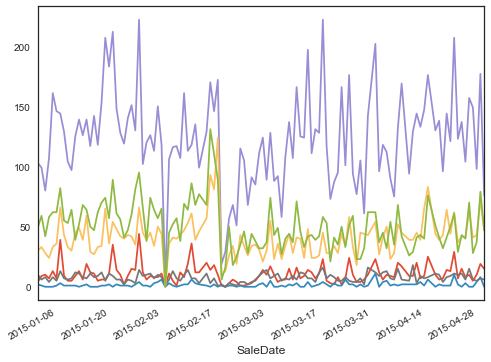

In [22]:
var[10].plot()
var[11].plot()
var[12].plot()
var[13].plot()
var[15].plot()
var[20].plot()